In [2]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Import MlFinlab tools
from mlfinlab.labeling import fixed_time_horizon

In [3]:
# Load price data. pd.Series is shown but pd.DataFrame works as well
msft = yf.Ticker('MSFT')
msft_df = msft.history(start='2010-1-1', end ='2020-5-18')

close = msft_df['Close']
close.head()

Date
2009-12-31    23.585039
2010-01-04    23.948719
2010-01-05    23.956459
2010-01-06    23.809435
2010-01-07    23.561827
Name: Close, dtype: float64

In [4]:
# Getting labels for a constant threshold of 1%. Will return 1 if the daily return is greater than 1%,
# -1 if less than -1%, and  0 if in between
bars1 = fixed_time_horizon(prices=close, threshold=0.01, lag=True)

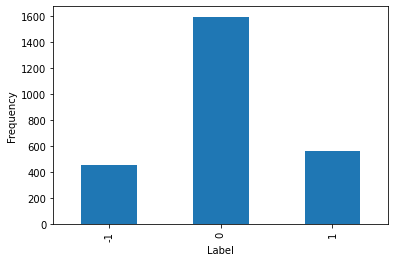

In [9]:
ax1 = bars1.value_counts().reindex([-1, 0, 1]).plot(kind='bar', x='label', y='frequency')
ax1.set_xlabel('Label')
ax1.set_ylabel('Frequency');

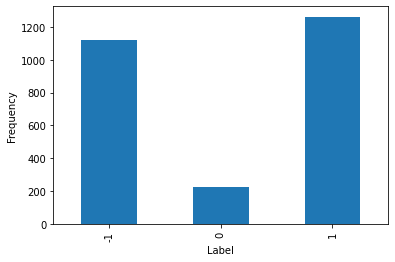

In [10]:
bars2 = fixed_time_horizon(prices=close, threshold=0.001, lag=True)
ax2 = bars2.value_counts().reindex([-1, 0, 1]).plot(kind='bar', x='label', y='frequency')
ax2.set_xlabel('Label')
ax2.set_ylabel('Frequency');

In [11]:
# Rolling standard deviation
msft_returns = close.pct_change(periods=1).shift(-1)
rolling_std = msft_returns.rolling(10).std()

In [12]:
bars3 = fixed_time_horizon(prices=close, threshold=rolling_std, lag=True)
#Because the first 9 values in the rolling_std are NaN due to the rolling window, there is no threshold to compare the first 9 returns to. So we must remove the first 9 returns as they are not labeled.
bars3 = bars3.iloc[9:]

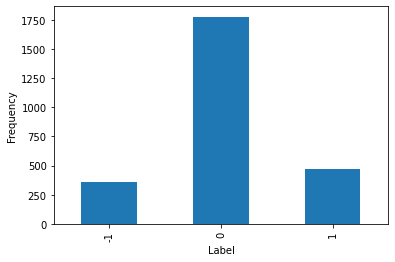

In [13]:
ax3 = bars3.value_counts().reindex([-1, 0, 1]).plot(kind='bar', x='label', y='frequency')
ax3.set_xlabel('Label')
ax3.set_ylabel('Frequency');

In [14]:
# Threshold on market returns
spy = yf.Ticker('SPY')
spy_df = spy.history(start='2010-1-1', end ='2020-5-18')
market_close = spy_df['Close']

market_returns = market_close.pct_change(1).shift(-1)
market_returns.head()

Date
2009-12-31    0.016960
2010-01-04    0.002647
2010-01-05    0.000704
2010-01-06    0.004221
2010-01-07    0.003328
Name: Close, dtype: float64

In [15]:
bars4 = fixed_time_horizon(prices=close, threshold=market_returns, lag=True)

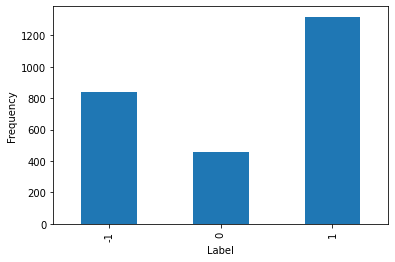

In [16]:
ax4 = bars4.value_counts().reindex([-1, 0, 1]).plot(kind='bar', x='label', y='frequency')
ax4.set_xlabel('Label')
ax4.set_ylabel('Frequency');

In [17]:
close.pct_change(periods=1).shift(-1)

Date
2009-12-31    0.015420
2010-01-04    0.000323
2010-01-05   -0.006137
2010-01-06   -0.010400
2010-01-07    0.006897
                ...   
2020-05-11   -0.022652
2020-05-12   -0.015123
2020-05-13    0.004339
2020-05-14    0.014568
2020-05-15         NaN
Name: Close, Length: 2611, dtype: float64

In [18]:
bars5 = fixed_time_horizon(prices=close, threshold=1, lag=True, standardized=True, window=5)

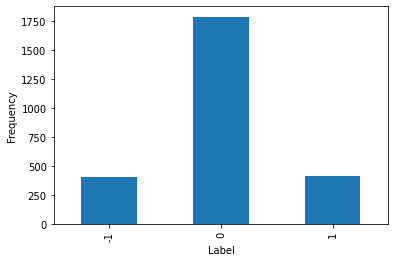

In [19]:
ax5 = bars5.value_counts().reindex([-1, 0, 1]).plot(kind='bar', x='label', y='frequency')
ax5.set_xlabel('Label')
ax5.set_ylabel('Frequency');

In [20]:
bars6 = fixed_time_horizon(prices=close, threshold=1, resample_by='W', lag=True, standardized=True, window=4)

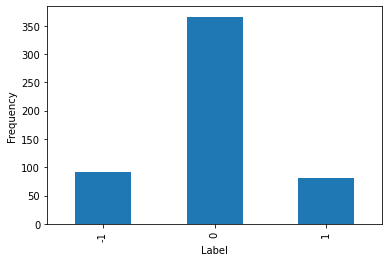

In [21]:
ax6 = bars6.value_counts().reindex([-1, 0, 1]).plot(kind='bar', x='label', y='frequency')
ax6.set_xlabel('Label')
ax6.set_ylabel('Frequency');